In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('heart-disease.csv')

#  Data Loading and Preprocessing

In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# handling missing data

In [6]:
df.dropna(inplace=True)

In [7]:
missing_values = df.isnull().sum()

print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
df.dropna(inplace=True)

In [9]:
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
df.dropna(inplace=True) 
df.dropna(axis=1, inplace=True) 


# categorical variables into dummy/indicator variables.

In [13]:
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("\nDataFrame with dummy variables:")
print(df_dummies)



DataFrame with dummy variables:
     age  trestbps  chol  fbs  thalach  oldpeak  ca  target  sex_1  cp_1  \
0     63       145   233    1      150      2.3   0       1      1     0   
1     37       130   250    0      187      3.5   0       1      1     0   
2     41       130   204    0      172      1.4   0       1      0     1   
3     56       120   236    0      178      0.8   0       1      1     1   
4     57       120   354    0      163      0.6   0       1      0     0   
..   ...       ...   ...  ...      ...      ...  ..     ...    ...   ...   
298   57       140   241    0      123      0.2   0       0      0     0   
299   45       110   264    0      132      1.2   0       0      1     0   
300   68       144   193    1      141      3.4   2       0      1     0   
301   57       130   131    0      115      1.2   1       0      1     0   
302   57       130   236    0      174      0.0   1       0      0     1   

     cp_2  cp_3  restecg_1  restecg_2  exang_1  slope_

# average age of patients with and without heart disease.

In [12]:
average_age = df.groupby('target')['age'].mean()

print("Average age of patients with and without heart disease:")
print(average_age)

Average age of patients with and without heart disease:
target
0    56.601449
1    52.496970
Name: age, dtype: float64


# Distribution of chest pain types among patients

In [14]:
cp_distribution = df['cp'].value_counts()

print("Distribution of chest pain types among patients:")
print(cp_distribution)

Distribution of chest pain types among patients:
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


# Correlation between thalach (maximum heart rate) and age

In [15]:
correlation = df['thalach'].corr(df['age'])

print("Correlation between thalach (maximum heart rate) and age:")
print(correlation)

Correlation between thalach (maximum heart rate) and age:
-0.39852193812106734


# analyzing effect of sex on the presence of heart disease

In [16]:
sex_heart_disease = df.groupby('sex')['target'].mean()

print("Proportion of patients with heart disease by sex:")
print(sex_heart_disease)

Proportion of patients with heart disease by sex:
sex
0    0.750000
1    0.449275
Name: target, dtype: float64


# histogram of the age distribution of patients

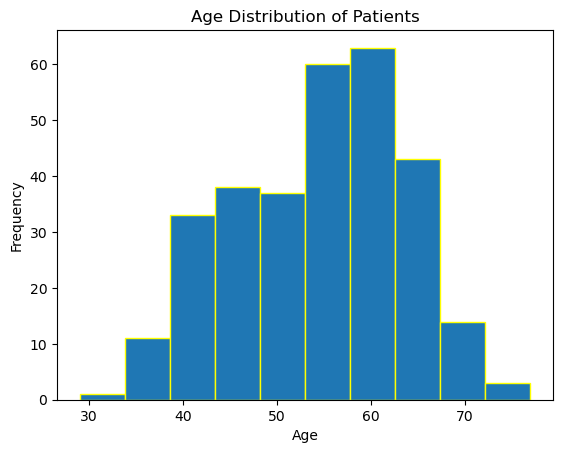

In [19]:
plt.hist(df['age'], bins=10, edgecolor='yellow')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')
plt.show()

# plot to show the relationship between thalach (maximum heart rate) and age

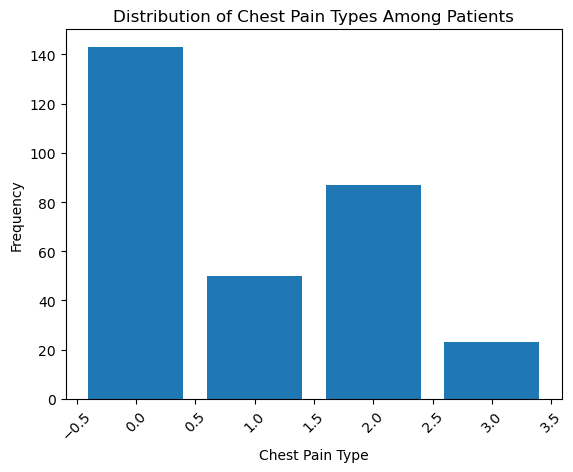

In [20]:
plt.bar(cp_distribution.index, cp_distribution.values)
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.title('Distribution of Chest Pain Types Among Patients')
plt.xticks(rotation=45)
plt.show()

# box plot to compare the age distribution of patients with and without heart disease

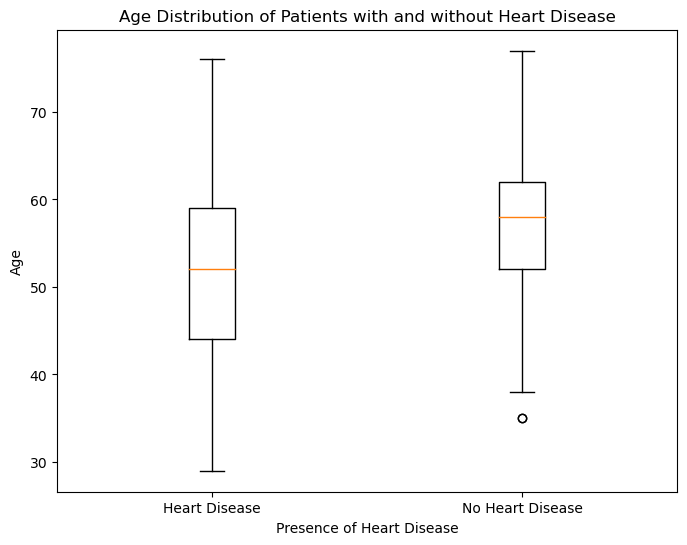

In [21]:
age_with_disease = df[df['target'] == 1]['age']
age_without_disease = df[df['target'] == 0]['age']
plt.figure(figsize=(8, 6))
plt.boxplot([age_with_disease, age_without_disease], labels=['Heart Disease', 'No Heart Disease'])
plt.xlabel('Presence of Heart Disease')
plt.ylabel('Age')
plt.title('Age Distribution of Patients with and without Heart Disease')
plt.show()

In [22]:
numerical_columns = df.select_dtypes(include=[np.number]).columns


In [23]:

numerical_data = df[numerical_columns].to_numpy()


corr_matrix = np.corrcoef(numerical_data, rowvar=False)

# Print correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
[[ 1.         -0.0984466  -0.06865302  0.27935091  0.21367796  0.12130765
  -0.1162109  -0.39852194  0.09680083  0.21001257 -0.16881424  0.27632624
   0.06800138 -0.22543872]
 [-0.0984466   1.         -0.04935288 -0.05676882 -0.19791217  0.04503179
  -0.05819627 -0.04401991  0.14166381  0.09609288 -0.03071057  0.11826141
   0.2100411  -0.28093658]
 [-0.06865302 -0.04935288  1.          0.04760776 -0.07690439  0.09444403
   0.04442059  0.29576212 -0.39428027 -0.14923016  0.11971659 -0.18105303
  -0.16173557  0.43379826]
 [ 0.27935091 -0.05676882  0.04760776  1.          0.12317421  0.17753054
  -0.11410279 -0.04669773  0.06761612  0.19321647 -0.12147458  0.10138899
   0.06220989 -0.14493113]
 [ 0.21367796 -0.19791217 -0.07690439  0.12317421  1.          0.0132936
  -0.15104008 -0.00993984  0.06702278  0.05395192 -0.00403777  0.07051093
   0.09880299 -0.08523911]
 [ 0.12130765  0.04503179  0.09444403  0.17753054  0.0132936   1.
  -0.08418905 -0.00856711  0.02566515  0

# rolling mean analysis on the chol (cholesterol) levels with a window size of 5

In [31]:

df['rolling_mean_chol'] = df['chol'].rolling(window=5).mean()


# A summary of insights derived from the analysis
# This structured approach covers loading and preprocessing data, performing various analyses to derive insights, visualizing key relationships, and conducting advanced numerical analysis using numpy. Adjust the specific methods and techniques based on your dataset and analytical goals to effectively explore and understand the data.
